<a href="https://colab.research.google.com/github/Bassam-Elsharkawy/Deep-Learning/blob/main/HealthCare_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
bmi,201
age,0
gender,0
hypertension,0
heart_disease,0
work_type,0
ever_married,0
Residence_type,0
avg_glucose_level,0
smoking_status,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, fill_value = 'mean')
df['bmi'] = imp.fit_transform(np.array(df['bmi']).reshape(-1, 1))

In [15]:
df.isnull().sum().sort_values(ascending = False)

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender'])
df['ever_married'] = lb.fit_transform(df['ever_married'])
df['work_type'] = lb.fit_transform(df['work_type'])
df['Residence_type'] = lb.fit_transform(df['Residence_type'])
df['smoking_status'] = lb.fit_transform(df['smoking_status'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [20]:
x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [21]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()
x = my_scaler.fit_transform(x)

stroke
0    4861
1     249
Name: count, dtype: int64


Text(0.5, 1.0, 'stroke')

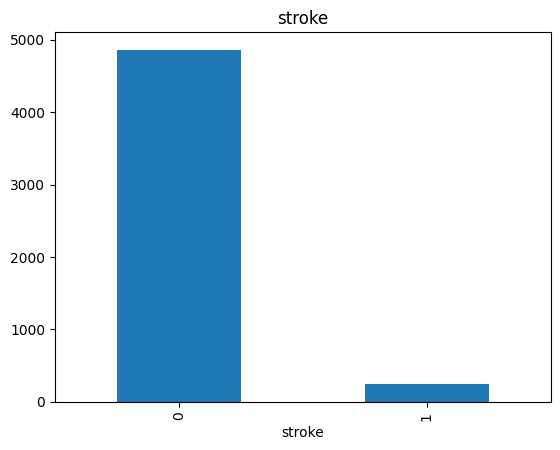

In [27]:
print(y.value_counts())
y.value_counts().plot(kind = 'bar').set_title('stroke')

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

x, y = sm.fit_resample(x, y)

In [29]:
x.shape

(9722, 10)

In [30]:
y.shape

(9722,)

stroke
1    4861
0    4861
Name: count, dtype: int64


Text(0.5, 1.0, 'after resampling')

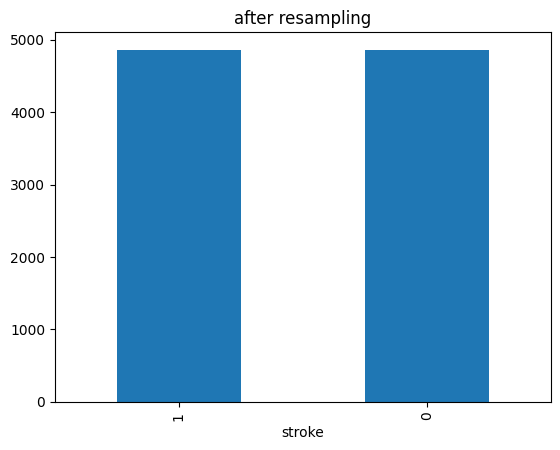

In [32]:
print(y.value_counts())
y.value_counts().plot(kind = 'bar').set_title('after resampling')

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [38]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (7777, 10)
x_test shape:  (1945, 10)
y_train shape:  (7777,)
y_test shape:  (1945,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors = 5)
knnModel.fit(x_train, y_train)

print("KNNModel Train Score: ", knnModel.score(x_train, y_train))
print("KNNModel Test Score: ", knnModel.score(x_test, y_test))

KNNModel Train Score:  0.9315931593159316
KNNModel Test Score:  0.9048843187660668


In [43]:
y_predict = knnModel.predict(x_test)

Confusion_Matrix: 
 [[805 168]
 [ 17 955]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       973
           1       0.85      0.98      0.91       972

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945



<Axes: >

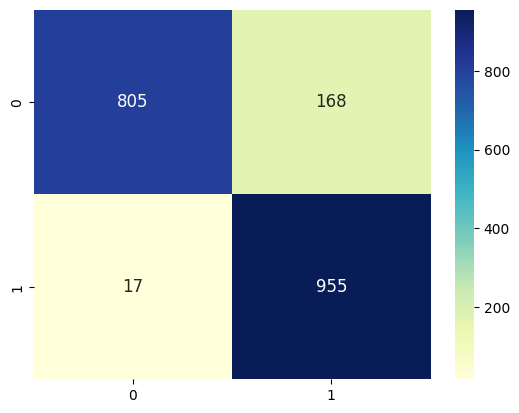

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion_Matrix: \n", confusion_matrix(y_test, y_predict))
print("Classification_Report: \n", classification_report(y_test, y_predict))

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, annot_kws = {'size' : 12}, fmt = 'g', cbar = True, cmap = 'YlGnBu')